# SVM

* Numpy 라이브러리는 행렬, 벡터 등의 수학 계산을 위한 잘구조와 계산 함수를 제공하는 패키지
* Pandas 라이브러리는 csv 파일 또는 데이터베이스에서 데이터를 읽고 쓸 수있는, 그리고 데이터 분석, 가공, 처리에 사용되는 패키지
* matplot 라이브러리의 pyplot 서브패키지는파이썬의 시각화 패키지
* sklearn 라이브러리에서 svm과 datasets 모듈
* datasets 모듈은 내장된 데이터 로드
* matplotlib inline은 이 환경에서의 데이터 시각화

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm, datasets
import seaborn as sb
import os

%matplotlib inline

In [3]:
iris = pd.read_csv('../dataset/iris.csv')
iris

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


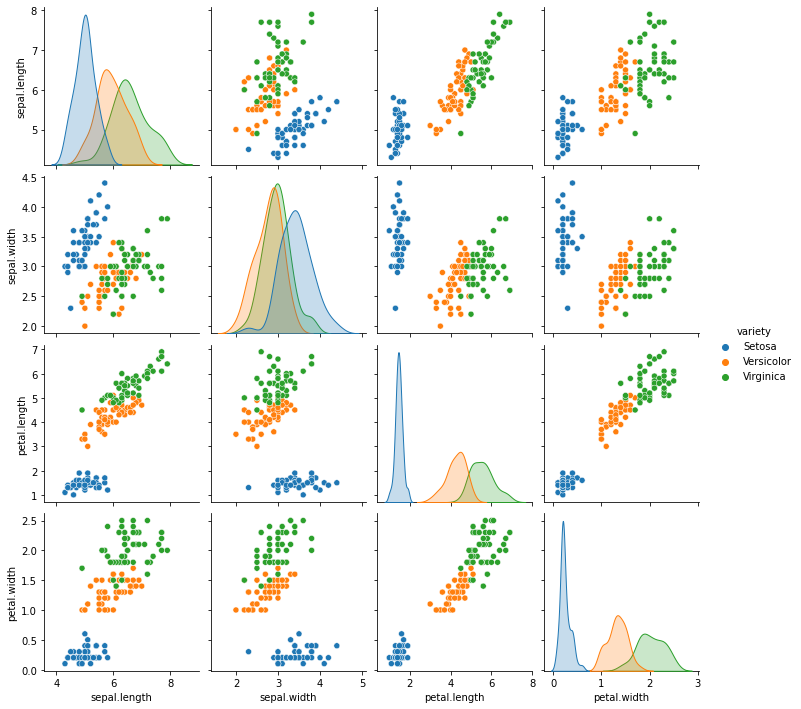

In [4]:
sb.pairplot(iris, hue='variety')
plt.show()

In [6]:
iris = datasets.load_iris()

print(iris.keys())
print(iris.data.shape)
print(iris.feature_names)

iris

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
(150, 4)
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [7]:
#DESCR() 함수를 통해 데이터 정보 제공
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [8]:
# 입력값(x)으로 {sepal.length, petal.width} 1차 선택
# 2차원 표현의 한계
# [:, :2] 조절해서 입력값 변경
# 출력값(y)은 품종
# SVM 모델 생성: 파라미터는 커널(기본 rbf, rbf/linear/polynomial 세 가지 사용
# 가능), C 값(기본 1.0, 낮추면 초평면이 매끄러워지고 높이면 서포트 벡터들을
# 더 잘 분류, 감마 값(기본 auto))
# rbf: Radial Basis Function
# "파이썬을 이용한 빅데이터 분석"
x = iris.data[:, :2]
y = iris.target
SVM = svm.SVC(kernel='linear', C=1).fit(x, y)
SVM

SVC(C=1, kernel='linear')

In [9]:
#데이터 시각화 전처리
#평면 그래프의 각 축에 위아래, 좌우로 각각 +1만큼 여유. 보기 좋으라고.
#"파이썬을 이용한 빅데이터 분석"
x_min, x_max = x[:, 0].min()-1, x[:, 0].max()+1
y_min, y_max = x[:, 1].min()-1, x[:, 1].max()+1
plot_unit = 0.025
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_unit), np.arange(y_min, y_max,
plot_unit))

<ipython-input-10-b03dbc76a7f3>:5: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, z, alpha=0.1)


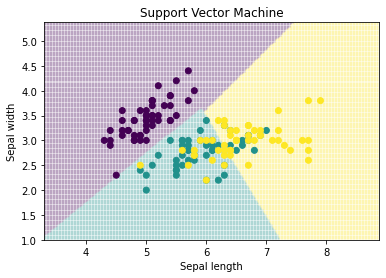

정확도 :  0.82


In [10]:
#케이스 1: (kernel='linear', C=1, gamma=auto)
#ravel()은 다차원 배열(array)를 1차원 배열로 평평하게 변환
z = SVM.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
plt.pcolormesh(xx, yy, z, alpha=0.1)
plt.scatter(x[:, 0],x[:, 1],c=y)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('Support Vector Machine')
plt.show()
print('정확도 : ',SVM.score(X = x, y = y))

<ipython-input-11-6e9becf78e0f>:5: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, z,alpha=0.1)


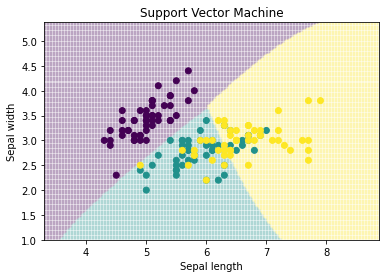

정확도 :  0.82


In [11]:
#케이스 2: (kernel='rbf', C=1, gamma=auto)
SVM = svm.SVC(kernel='rbf', C=1).fit(x, y)
z = SVM.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
plt.pcolormesh(xx, yy, z,alpha=0.1)
plt.scatter(x[:, 0],x[:, 1],c=y)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('Support Vector Machine')
plt.show()
print('정확도 : ',SVM.score(X = x, y = y))

<ipython-input-13-2bc790ccd301>:5: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, z, alpha=0.1)


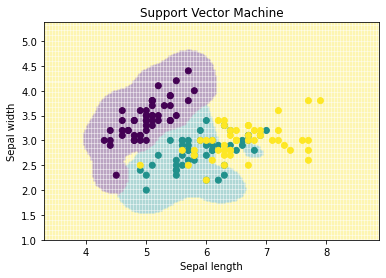

정확도 :  0.84


In [13]:
#케이스 3: (kernel='rbf', C=1, gamma=10)
SVM = svm.SVC(kernel='rbf', C=1, gamma=10).fit(x, y)
z = SVM.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
plt.pcolormesh(xx, yy, z, alpha=0.1)
plt.scatter(x[:, 0],x[:, 1],c=y)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('Support Vector Machine')
plt.show()
print('정확도 : ',SVM.score(X = x, y = y))

<ipython-input-12-b5071624abce>:5: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, z,alpha=0.1)


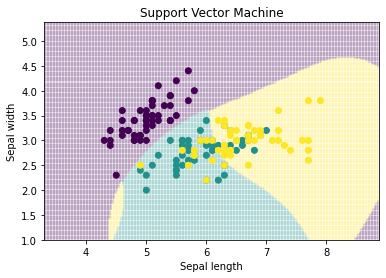

정확도 :  0.8333333333333334


In [12]:
#케이스 4: (kernel=’rbf’, C=100, gamma=auto)
SVM = svm.SVC(kernel='rbf', C=100).fit(x, y)
z = SVM.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
plt.pcolormesh(xx, yy, z,alpha=0.1)
plt.scatter(x[:, 0],x[:, 1],c=y)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('Support Vector Machine')
plt.show()
print('정확도 : ',SVM.score(X = x, y = y))

<ipython-input-16-e7dd28601585>:5: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, z,alpha=0.1)


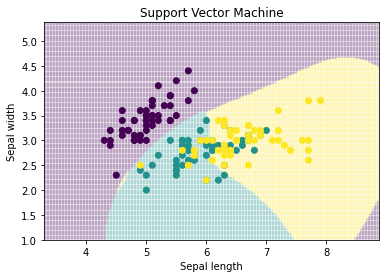

정확도 :  0.82


In [16]:
#케이스 5: (kernel='rbf', C=1000, gamma=auto)
SVM = svm.SVC(kernel='rbf', C=1000).fit(x, y)
z = SVM.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
plt.pcolormesh(xx, yy, z,alpha=0.1)
plt.scatter(x[:, 0],x[:, 1],c=y)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('Support Vector Machine')
plt.show()
print('정확도 : ',SVM.score(X = x, y = y))